Importing Libs

In [1]:
import cv2     # for capturing videos
import math   # for mathematical operations
import matplotlib.pyplot as plt    # for plotting the images
%matplotlib inline
import pandas as pd
import keras
import tensorflow as tf
from keras.preprocessing import image   # for preprocessing the images
import numpy as np    # for mathematical operations
#from keras. import np_utils
from skimage.transform import resize   # for resizing images
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.applications.resnet import ResNet50
from keras.applications.vgg19 import VGG19
from keras.layers import Dense, InputLayer, Dropout, Flatten, Conv2D , MaxPool2D
from keras.models import Model
import keras.utils as image
from scipy import stats as s
from glob import glob
from tqdm import tqdm
import os
from sklearn.metrics import classification_report
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score,confusion_matrix
import itertools

getting video file names and tags

In [2]:
def Get_Data():
    dirs = ['Depth']
    paths = ['01','02','03','04','05','06']
    lst = []
    lst_features_train = []
    lst_features_test = []
    lst_labels_train = []
    lst_labels_test = []
    s = pd.read_excel('Depth/groundTruth.xlsx')
    labels = s['SentenceID']
    for i in range(1,10):
        lst.append('000'+str(i))
    for i in range(10,51):
        lst.append('00'+str(i))   
    for a in dirs:
        for b in paths:
            for c in range(len(lst)):
                for files in os.listdir((r'Depth/{0}/train/{1}'.format(b,lst[c]))):
                    lst_features_train.append((r'Depth/{0}/train/{1}'.format(b,lst[c]))+'/'+files)
                    lst_labels_train.append(labels[c])
                for files in os.listdir((r'Depth/{0}/test/{1}'.format(b,lst[c]))):
                    lst_features_test.append((r'Depth/{0}/test/{1}'.format(b,lst[c]))+'/'+files)
                    lst_labels_test.append(labels[c])
    return lst_features_train, lst_labels_train, lst_features_test, lst_labels_test
vidTrain, tagTrain, vidTest, tagTest = Get_Data()
videotrain = pd.DataFrame()
videotest = pd.DataFrame()
videotrain['video_name'] = vidTrain
# creating tags for training videos
videotrain['tag'] = tagTrain
videotrain = videotrain[:-1]

videotest['video_name'] = vidTest
videotest['tag'] = tagTest
videotest = videotest[:-1]
print(len(vidTrain),len(tagTrain))
print(len(vidTest),len(tagTest))

7478 7478
1843 1843


In [3]:
videotrain.head()

,video_name,tag
0,Depth/01/train/0001/01_0001_(10_03_21_20_37_17...,1
1,Depth/01/train/0001/01_0001_(10_03_21_20_37_21...,1
2,Depth/01/train/0001/01_0001_(10_03_21_20_37_24...,1
3,Depth/01/train/0001/01_0001_(10_03_21_20_37_29...,1
4,Depth/01/train/0001/01_0001_(10_03_21_20_37_33...,1


In [4]:
videotest.head()

,video_name,tag
0,Depth/01/test/0001/01_0001_(10_03_21_20_37_10)...,1
1,Depth/01/test/0001/01_0001_(10_03_21_20_37_13)...,1
2,Depth/01/test/0001/01_0001_(10_03_21_20_40_26)...,1
3,Depth/01/test/0001/01_0001_(13_02_21_19_07_54)...,1
4,Depth/01/test/0001/01_0001_(13_02_21_19_08_01)...,1


Splitting Videos to frames

In [5]:
# # storing the frames from training videos
# for i in tqdm(range(videotrain.shape[0])): 
#     count = 0
#     videoFile = videotrain['video_name'][i]
#     cap = cv2.VideoCapture(videoFile)
#     ret = True
#     while (ret):
#         ret, img = cap.read()
#         if (ret != True):
#             break
#         filename ='train/' + videoFile.split('/')[3]+'_' +"_frame%d.jpg" % count;count+=1
#         cv2.imwrite(filename, img)
#     cap.release()

In [6]:
# # storing the frames from training videos
# for i in tqdm(range(videotest.shape[0])): 
#     count = 0
#     videoFile = videotest['video_name'][i]
#     cap = cv2.VideoCapture(videoFile)
#     ret = True
#     while (ret):
#         ret, img = cap.read()
#         if (ret != True):
#             break
#         filename ='test/' + videoFile.split('/')[3]+'_' +"_frame%d.jpg" % count;count+=1
#         cv2.imwrite(filename, img)
#     cap.release()

Saving Images as labeled images

In [7]:
# getting the names of all the images
images_train = glob("train/*.jpg")
images_test = glob("test/*.jpg")
print(len(images_train),len(images_test))
train_image = []
train_class = []
test_image = []
test_class = []
for i in tqdm(range(len(images_train))):
    # creating the image name
    train_image.append(images_train[i].split('\\')[1].split('_')[2])
    #creating the class of image
    train_class.append(images_train[i].split('\\')[1].split('_')[0])

for i in tqdm(range(len(images_test))):
    # creating the image name
    test_image.append(images_test[i].split('\\')[1].split('_')[2])
    # creating the class of image
    test_class.append(images_test[i].split('\\')[1].split('_')[0])
    
# storing the images and their class in a dataframe
train_data = pd.DataFrame()
train_data['image'] = train_image
train_data['class'] = train_class

test_data = pd.DataFrame()
test_data['image'] = test_image
test_data['class'] = test_class

# converting the dataframe into csv file 
train_data.to_csv('train_new.csv',header=True, index=False)
test_data.to_csv('test_new.csv',header=True, index=False)

8552 7864


100%|█████████████████████████████████████████████████████████████████████████| 7864/7864 [00:00<00:00, 1298838.62it/s]


In [8]:
train = pd.read_csv('train_new.csv')
test = pd.read_csv('test_new.csv')

In [9]:
train.head()

,image,class
0,frame0.jpg,1
1,frame1.jpg,1
2,frame10.jpg,1
3,frame11.jpg,1
4,frame12.jpg,1


In [10]:
test.head()

,image,class
0,frame0.jpg,1
1,frame1.jpg,1
2,frame10.jpg,1
3,frame11.jpg,1
4,frame12.jpg,1


Preprocessing images

In [11]:
# creating an empty list
train_image = []
test_image = []

# for loop to read and store frames
for i in tqdm(range(train.shape[0])):
    # loading the image and keeping the target size as (224,224,3)
    img = image.load_img('train/'+train_class[i]+'__'+train['image'][i], target_size=(224,224,3))
    # converting it to array
    img = image.img_to_array(img)
    # normalizing the pixel value
    img = img/255
    # appending the image to the train_image list
    train_image.append(img)
    
# for loop to read and store frames
for i in tqdm(range(test.shape[0])):
    # loading the image and keeping the target size as (224,224,3)
    img = image.load_img('test/'+test_class[i]+'__'+test['image'][i], target_size=(224,224,3))
    # converting it to array
    img = image.img_to_array(img)
    # normalizing the pixel value
    img = img/255
    # appending the image to the train_image list
    test_image.append(img)

100%|█████████████████████████████████████████████████████████████████████████████| 7864/7864 [00:43<00:00, 182.56it/s]


Conveting input images to array of pixels

In [12]:
# converting the list to numpy array
X = np.array(train_image)
y = train['class']
X_eval = np.array(test_image)
y_eval = test['class']

Splitting data to train and test

In [13]:
# creating the training and validation set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [14]:
print(X_train.shape, X_test.shape)

(6841, 224, 224, 3) (1711, 224, 224, 3)


Conversion of labels to integers

In [15]:
# # creating dummies of target variable for train and validation set
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)
y_eval = pd.get_dummies(y_eval)

Construction of the model

In [16]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(224, 224, 3)))
model.add(MaxPool2D())
model.add(Dropout(0.4))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(50, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 112, 112, 32)      0         
                                                                 
 dense (Dense)               (None, 112, 112, 512)     16896     
                                                                 
 dropout_1 (Dropout)         (None, 112, 112, 512)     0         
                                                                 
 dense_1 (Dense)             (None, 112, 112, 128)     65664     
                                                        

In [17]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

Fitting the model

In [18]:
from keras.optimizers import Adam
opt = Adam(lr=0.000001)
model.compile(optimizer = opt , loss = tf.keras.losses.categorical_crossentropy , metrics = ['accuracy'])

C:\Users\Mustafa\Anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [19]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath='C:\\checkpoints\\',
                                                 save_weights_only=True,
                                                 verbose=1)
with tf.device('/CPU:0'):
    history = model.fit(X_train,y_train,epochs = 1, batch_size = 30, validation_data = (X_eval, y_eval),callbacks=[cp_callback])

In [20]:
# Loads the weights
model.load_weights('checkpoints/')

In [21]:
with tf.device('/CPU:0'):
    predictions=model.predict(X_eval) 

246/246 [==============================] - 179s 728ms/step


In [22]:
print(predictions.shape,y_eval.shape)

(7864, 50) (7864, 50)


In [24]:
y_eval = np.array(y_eval)

In [25]:
y_eval = y_eval.reshape(7864, 50)

In [26]:
uniq_labels = ['اسم الله',
 'الحمد الله',
 'جميع الصم العرب  السامع',
 'السلام عليكم رحمة الله بركة',
 'اليوم اقدم انتم برنامج اخر',
 'موضوع دراسة لغة الاشارة العربية',
 'كلمات اليوم متفرقة في الدين',
 'ايضا كلمات عادية',
 'لا شرك الله',
 'الله اكبر',
 'لا شرك الله احد',
 'العبادة الله واحد',
 'الله كريم',
 'الله رزق',
 'ايضا كلمات مختلف',
 'كلنا فقير الله',
 'الله غني',
 'الله يساعد جميع الناس',
 'الحياة خلق الله',
 'لمن جميع الناس',
 'الله خلق الناس عبادة',
 'شكرا انتم',
 'ترحيب انتم دائما',
 'ايضا تمني اشارة-هو التعاون لكم',
 'تعليم لغة الاشارة مع الامائيات',
 'انا حب تعليم لغة الاشارة',
 'انا سفر',
 'اين السعودية',
 'غدا احتمال في امتحان',
 'الجسم تفاعل مع الكلمة',
 'الصم تمني اشارة-هم جميع السامع',
 'تفاعل مع الصم تواصل',
 'تفاعل الجسم مع',
 'هنا نكتفي',
 'الله لقاء انتم',
 'الله قبول عمل',
 'تمني الله فائدة',
 'نحن انتم جميع',
 'كلمة اول',
 'الله اعوذ',
 'نصائح طبية',
 'موضوع فايروس كورونا',
 'الجزء الثاني',
 'يوم القيامة',
 'الصلة الخمس',
 'خطبة الجمعة',
 'لقاء غدا اسم الله',
 'استمرار انتم',
 'الله اعلم',
 'اكتساب لغة الاشارة']

In [27]:
ascore = accuracy_score(y_eval.round(), predictions.round())
ascore

0.8311291963377416

In [28]:
cm = confusion_matrix(y_eval.argmax(axis=1), predictions.argmax(axis=1))
cm

array([[ 77,   0,   0, ...,   0,   0,   0],
       [  7,  79,   0, ...,   0,   0,   0],
       [  0,   0,  69, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,  83,   2,   0],
       [  0,   0,   0, ...,   0, 101,   0],
       [  0,   0,   0, ...,   0,   0, 139]], dtype=int64)

In [29]:
cr = classification_report(y_eval.round(), predictions.round())
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.87      0.89        77
           1       0.99      0.81      0.89        97
           2       1.00      0.27      0.43       240
           3       0.92      0.94      0.93       232
           4       1.00      0.90      0.95       240
           5       0.92      1.00      0.96       243
           6       0.97      0.84      0.90       264
           7       1.00      0.99      0.99       172
           8       1.00      0.63      0.77       158
           9       0.83      1.00      0.91        92
          10       0.80      0.90      0.84       212
          11       1.00      0.73      0.84       161
          12       0.99      0.80      0.88       122
          13       0.99      0.90      0.94       130
          14       1.00      0.93      0.96       162
          15       1.00      0.93      0.97       165
          16       0.94      0.78      0.85       124
          17       0.97    

C:\Users\Mustafa\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
def plot_confusion_matrix(y, y_pred):
    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize = (24, 20))
    ax = plt.subplot()
    plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Purples)
    plt.colorbar()
    plt.title("Confusion Matrix")
    tick_marks = np.arange(len(uniq_labels))
    plt.xticks(tick_marks, uniq_labels, rotation=45)
    plt.yticks(tick_marks, uniq_labels)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    ax.title.set_fontsize(20)
    ax.xaxis.label.set_fontsize(16)
    ax.yaxis.label.set_fontsize(16)
    limit = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment = "center",color = "white" if cm[i, j] > limit else "black")
    plt.show()

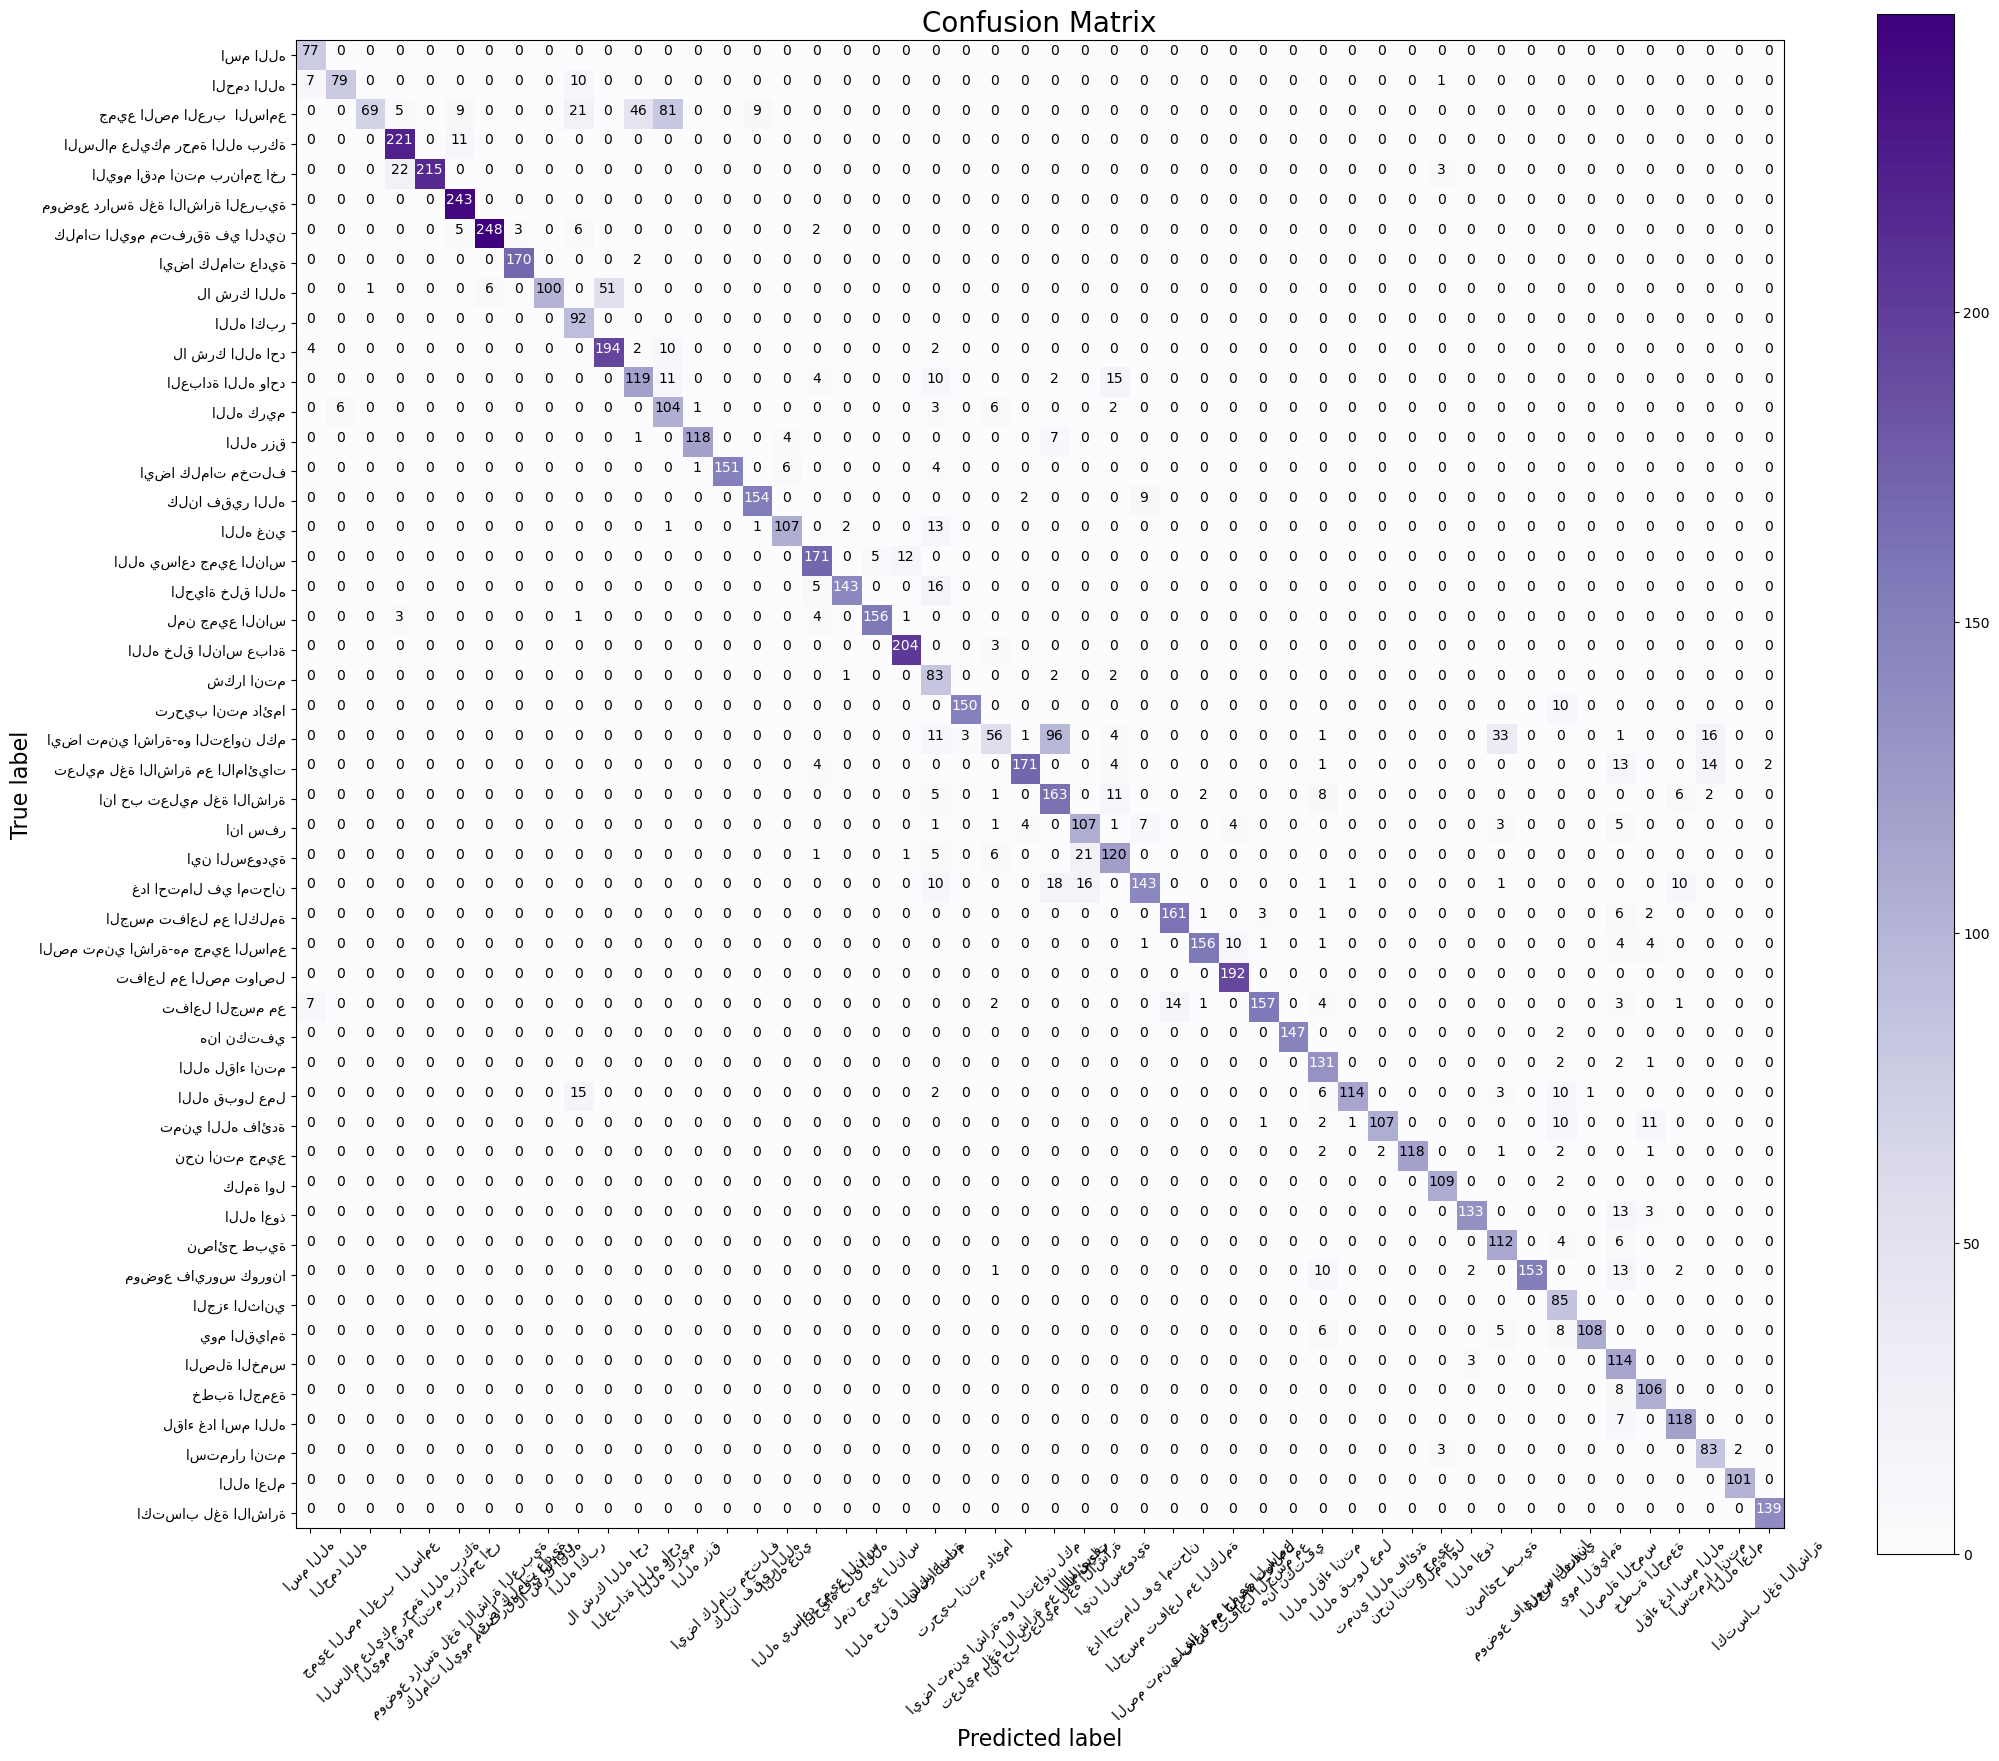

In [31]:
plot_confusion_matrix(y_eval.argmax(axis=1), predictions.argmax(axis=1))

In [32]:
# count = 0
# videoFile = '05_0009_(10_03_21_23_15_22)_d.mp4'
# cap = cv2.VideoCapture(videoFile)
# ret = True
# while (ret):
#     ret, img = cap.read()
#     if (ret != True):
#         break
#     filename ='prepare/' + videoFile.split('/')[0].split('_')[1]+'_' +"_frame%d.jpg" % count;count+=1
    
#     cv2.imwrite(filename, img)
# cap.release()

In [33]:
images = glob("prepare/*.jpg")
images_ = []
classes_ = []
for i in tqdm(range(len(images))):
    # creating the image name
    #images_.append(images[i].split('\\')[1].split('_')[2])
    img = image.load_img(images[i], target_size=(224,224,3))
    # converting it to array
    img = image.img_to_array(img)
    # normalizing the pixel value
    img = img/255
    # appending the image to the train_image list
    images_.append(img)
    #creating the class of image
    classes_.append(images[i].split('\\')[1].split('_')[0])

100%|███████████████████████████████████████████████████████████████████████████████| 137/137 [00:00<00:00, 492.15it/s]


In [34]:
images_

[array([[[0.9490196 , 0.9490196 , 0.9490196 ],
         [0.3529412 , 0.3529412 , 0.3529412 ],
         [0.01176471, 0.01176471, 0.01176471],
         ...,
         [0.03529412, 0.03529412, 0.03529412],
         [0.00784314, 0.00784314, 0.00784314],
         [0.96862745, 0.96862745, 0.96862745]],
 
        [[0.36862746, 0.36862746, 0.36862746],
         [0.3529412 , 0.3529412 , 0.3529412 ],
         [0.3764706 , 0.3764706 , 0.3764706 ],
         ...,
         [0.4627451 , 0.4627451 , 0.4627451 ],
         [0.01176471, 0.01176471, 0.01176471],
         [0.02352941, 0.02352941, 0.02352941]],
 
        [[0.36078432, 0.36078432, 0.36078432],
         [0.35686275, 0.35686275, 0.35686275],
         [0.3882353 , 0.3882353 , 0.3882353 ],
         ...,
         [0.00784314, 0.00784314, 0.00784314],
         [0.00784314, 0.00784314, 0.00784314],
         [0.47058824, 0.47058824, 0.47058824]],
 
        ...,
 
        [[0.3647059 , 0.3647059 , 0.3647059 ],
         [0.3647059 , 0.3647059 , 0.36470

In [35]:
classes_

['0009',
 '0009',
 '0009',
 '0009',
 '0009',
 '0009',
 '0009',
 '0009',
 '0009',
 '0009',
 '0009',
 '0009',
 '0009',
 '0009',
 '0009',
 '0009',
 '0009',
 '0009',
 '0009',
 '0009',
 '0009',
 '0009',
 '0009',
 '0009',
 '0009',
 '0009',
 '0009',
 '0009',
 '0009',
 '0009',
 '0009',
 '0009',
 '0009',
 '0009',
 '0009',
 '0009',
 '0009',
 '0009',
 '0009',
 '0009',
 '0009',
 '0009',
 '0009',
 '0009',
 '0009',
 '0009',
 '0009',
 '0009',
 '0009',
 '0009',
 '0009',
 '0009',
 '0009',
 '0009',
 '0009',
 '0009',
 '0009',
 '0009',
 '0009',
 '0009',
 '0009',
 '0009',
 '0009',
 '0009',
 '0009',
 '0009',
 '0009',
 '0009',
 '0009',
 '0009',
 '0009',
 '0009',
 '0009',
 '0009',
 '0009',
 '0009',
 '0009',
 '0009',
 '0009',
 '0009',
 '0009',
 '0009',
 '0009',
 '0009',
 '0009',
 '0009',
 '0009',
 '0009',
 '0009',
 '0009',
 '0009',
 '0009',
 '0009',
 '0009',
 '0009',
 '0009',
 '0009',
 '0009',
 '0009',
 '0009',
 '0009',
 '0009',
 '0009',
 '0009',
 '0009',
 '0009',
 '0009',
 '0009',
 '0009',
 '0009',
 '0009',
 

In [36]:
X_Prepare = np.array(images_)
prepare = pd.DataFrame()
prepare['image'] = images_
prepare['class'] = classes_

In [37]:
y_prepare = prepare['class']
y_prepare = pd.get_dummies(y_prepare)

In [38]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(224, 224, 3)))
model.add(MaxPool2D())
model.add(Dropout(0.4))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(50, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 112, 112, 32)      0         
                                                                 
 dense_3 (Dense)             (None, 112, 112, 512)     16896     
                                                                 
 dropout_4 (Dropout)         (None, 112, 112, 512)     0         
                                                                 
 dense_4 (Dense)             (None, 112, 112, 128)     65664     
                                                      

In [39]:
model.load_weights('checkpoints/')
predictions_prepare = model.predict(X_Prepare)

5/5 [==============================] - 8s 54ms/step


In [40]:
y_prepare = np.array(y_prepare)
predictions_prepare = np.array(predictions_prepare)

In [41]:
predictions_prepare.shape

(137, 50)

In [44]:
#tf.compat.v1.disable_eager_execution()
sess = tf.compat.v1.InteractiveSession()

# Output Values
output = predictions_prepare

# Index of top values
indexes = tf.argmax(output, axis=1)
print(np.bincount(indexes).argmax())

9


C:\Users\Mustafa\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\client\session.py:1769: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [45]:
arr_values = indexes.numpy()
arr_values

array([ 2,  2,  9,  9,  9,  9,  9,  2,  2,  2,  2,  2,  2,  9,  2,  2,  2,
        2,  2,  2,  9,  9,  9,  9,  8,  9,  2,  2,  2,  2,  2,  2,  9,  9,
        2,  8,  9,  2,  9,  9,  2,  2,  2,  8,  8,  5,  5,  5,  5,  5,  5,
        5,  2,  8,  9,  2,  9,  9,  9,  9, 26,  2,  2,  2,  2,  9,  9,  9,
        9,  8,  9,  2,  9,  9,  9,  9,  9,  9,  2,  9,  2,  9,  2,  9,  9,
        9,  9,  8,  9,  9,  9,  9,  9,  5,  9,  9,  9,  9,  8,  8,  9,  8,
        8,  2,  5,  9,  9,  9,  9,  9,  9,  9,  8,  9,  9,  8,  9,  9,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9], dtype=int64)